In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from eofs.multivariate.standard import MultivariateEof

Loading the Data from previously generated HAFS Output

In [5]:
with open("CompleteData/all_frames200.pkl", "rb") as f:
    loaded_data = pickle.load(f)

with open('CompleteData/all_frames_100to100.pkl', 'rb') as f:
        loaded_data100 = pickle.load(f)

with open('CompleteData/all_frames_200to200.pkl', 'rb') as f:
        loaded_data200 = pickle.load(f)

Initial Data Analysis

In [6]:
total_samples = len(loaded_data['center_pressure']) + len(loaded_data100['center_pressure']) + len(loaded_data200['center_pressure'])
print(f'There are {total_samples} samples' )

There are 240 samples


In [11]:
# Have to do some cleaning to collapse data into 1d arrays

center_pressure = np.concatenate([loaded_data['center_pressure'], loaded_data100['center_pressure'], loaded_data200['center_pressure']])
gh = np.concatenate([loaded_data['gh'], loaded_data100['gh'], loaded_data200['gh'],])
t = np.concatenate([loaded_data['t'], loaded_data100['t'], loaded_data200['t'],])
rh = np.concatenate([loaded_data['r'], loaded_data100['r'], loaded_data200['r']])
radius = np.concatenate([loaded_data['radius_coords']])[0]
angle = np.concatenate([loaded_data['angle_coords']])[0]


Text(0.5, 0, 'Minimum Central Pressure')

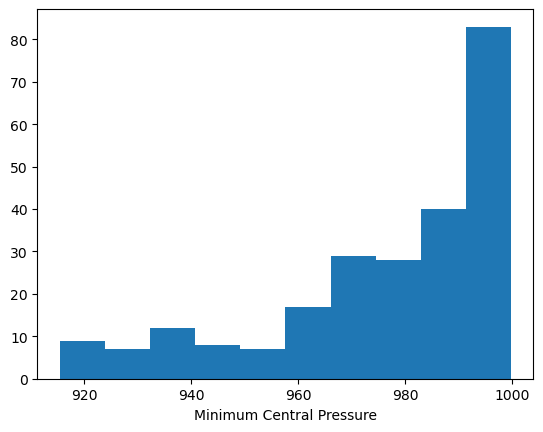

In [14]:
plt.hist(center_pressure)
plt.xlabel('Minimum Central Pressure')

In [12]:
gh_clean = []
t_clean = []
rh_clean = []
center_pressure_clean = []

drop_frames = []
for i in range(101):
    if (np.sum(np.isnan(gh[i,:,:]), axis = None)
        or np.sum(np.isnan(t[i,:,:]), axis = None)
        or np.sum(np.isnan(rh[i,:,:]), axis = None)):
        print(f"Frame {i} has NaNs")
    else:
        gh_clean.append(gh[i,:,:])
        rh_clean.append(rh[i,:,:])
        t_clean.append(t[i,:,:])
        center_pressure_clean.append(center_pressure[i])

gh_clean = np.concatenate([gh_clean])
rh_clean = np.concatenate([rh_clean])
t_clean = np.concatenate([t_clean])
center_pressure_clean = np.concatenate([center_pressure_clean])

Frame 36 has NaNs
Frame 75 has NaNs
Frame 83 has NaNs
Frame 84 has NaNs
Frame 85 has NaNs
Frame 86 has NaNs
Frame 97 has NaNs


In [18]:
# indexes based on pressure

index_985 = np.where(center_pressure_clean >= 980)
index_980_960 = np.where((980 > center_pressure_clean) & (center_pressure_clean >= 960))
index_960 = np.where((960 > center_pressure_clean))

In [19]:
#creating composites based on pressure ranges

gh_980 = np.nanmean(gh[index_985], axis = 0)
t_980 = np.nanmean(t[index_985], axis = 0)
rh_980 = np.nanmean(rh[index_985], axis = 0)
gh_980_960 = np.nanmean(gh[index_980_960], axis = 0)
t_980_960 = np.nanmean(t[index_980_960], axis = 0)
rh_980_960 = np.nanmean(rh[index_980_960], axis = 0)
gh_960 = np.nanmean(gh[index_960], axis = 0)
t_960 = np.nanmean(t[index_960], axis = 0)
rh_960 = np.nanmean(rh[index_960], axis = 0)

Text(0.5, 0.98, 'Tropical Cyclone Variable Composites based on Minimum Central Pressure')

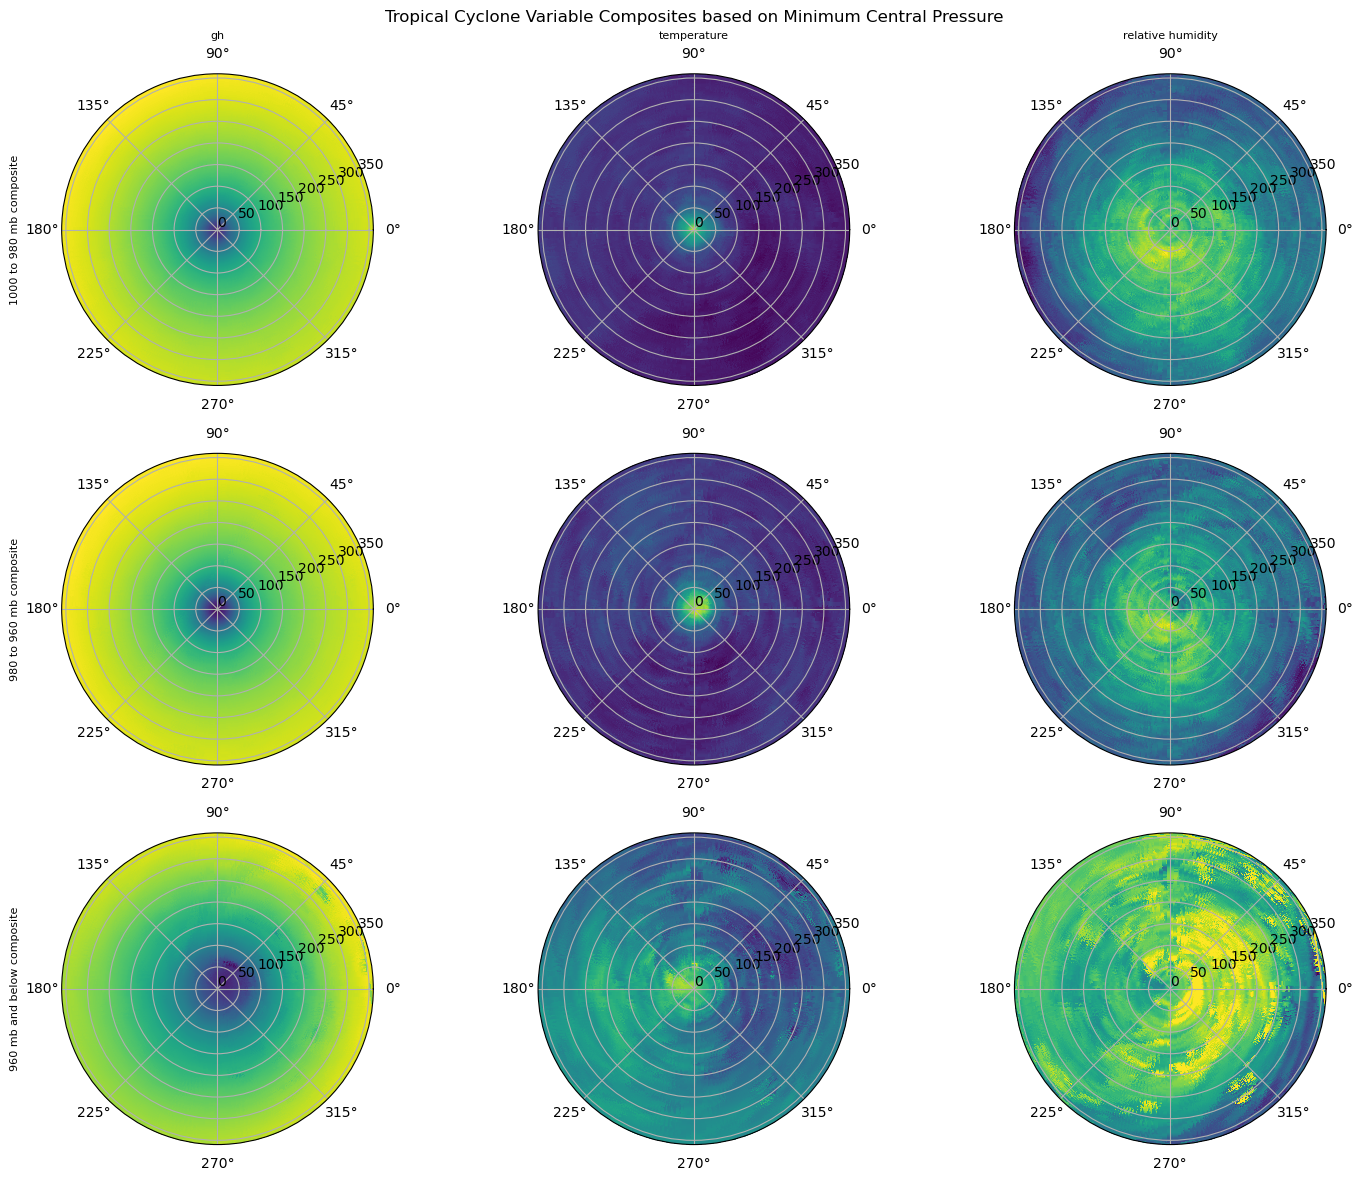

In [21]:
fig, ax = plt.subplots(nrows= 3, ncols=3, figsize=(16, 12),subplot_kw={'projection': 'polar'})

R, Theta = np.meshgrid(radius, angle)


ax[0,0].pcolormesh(R, Theta, gh_980)
ax[0,1].pcolormesh(R, Theta, t_980)
ax[0,2].pcolormesh(R, Theta, rh_980)
ax[1,0].pcolormesh(R, Theta, gh_980_960)
ax[1,1].pcolormesh(R, Theta, t_980_960)
ax[1,2].pcolormesh(R, Theta, rh_980_960)
ax[2,0].pcolormesh(R, Theta, gh_960)
ax[2,1].pcolormesh(R, Theta, t_960)
ax[2,2].pcolormesh(R, Theta, rh_960)

ax[0,0].set_ylabel('1000 to 980 mb composite', fontsize = 8, labelpad = 30)
ax[1,0].set_ylabel('980 to 960 mb composite', fontsize = 8, labelpad = 30)
ax[2,0].set_ylabel('960 mb and below composite', fontsize = 8, labelpad = 30)

ax[0,0].set_title('gh', fontsize = 8)
ax[0,1].set_title('temperature', fontsize = 8)
ax[0,2].set_title('relative humidity', fontsize = 8)

fig.set_tight_layout(tight = True)
fig.suptitle('Tropical Cyclone Variable Composites based on Minimum Central Pressure')

Calculating weights and constructing EOFs

In [22]:
max_range = 250.0
range_step = 0.5
angle_step = 0.5
range_gates = np.arange(0.0, max_range + range_step, range_step)

areas = []

for i, r in enumerate(range_gates):
    
    area = (angle_step/360) * np.pi * ((r + range_step)**2 - r**2)
    areas.append(area)

area_weight = areas/np.max(areas)

In [23]:
msolver = MultivariateEof([gh_clean,t_clean,rh_clean])
gh_eof, t_eof, rh_eof = msolver.eofsAsCorrelation(neofs=10)

In [24]:
pcs = msolver.pcs()

Text(0.5, 0.98, 'First 3 EOFs for a Multivariate EOF consisting of gh, Temp, and RH')

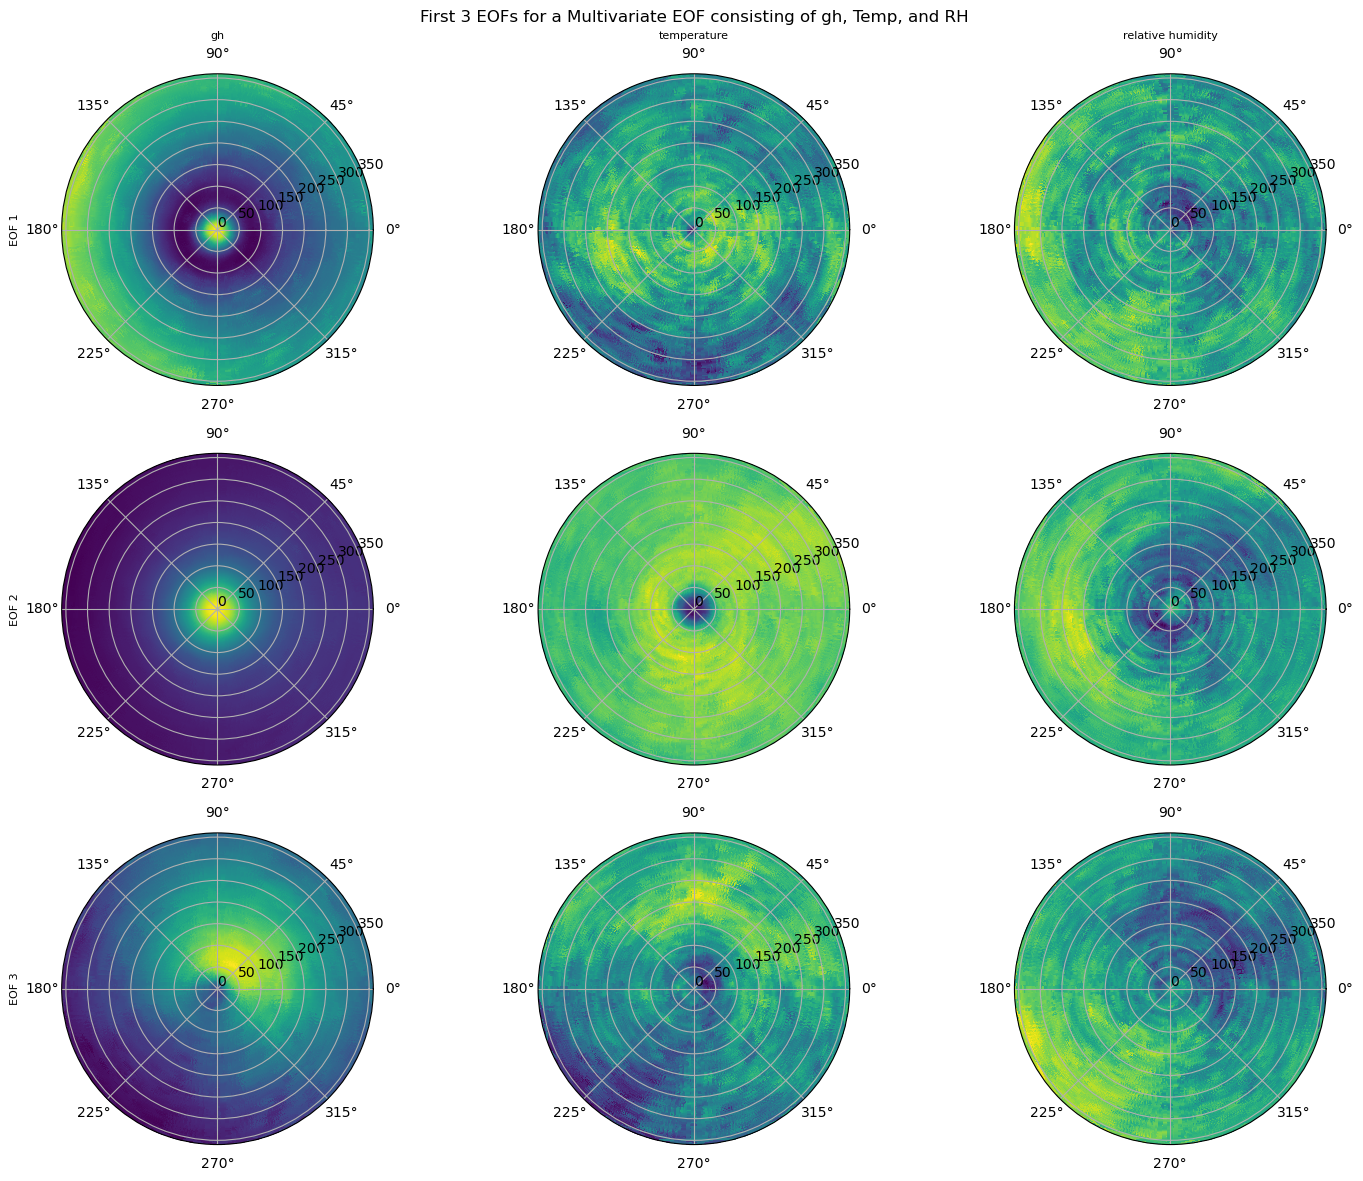

In [39]:
fig, ax = plt.subplots(nrows= 3, ncols=3, figsize=(16, 12),subplot_kw={'projection': 'polar'})

R, Theta = np.meshgrid(radius, angle)


ax[0,0].pcolormesh(R, Theta, gh_eof[0,:,:])
ax[0,1].pcolormesh(R, Theta, t_eof[0,:,:])
ax[0,2].pcolormesh(R, Theta, rh_eof[0,:,:])
ax[1,0].pcolormesh(R, Theta, gh_eof[1,:,:])
ax[1,1].pcolormesh(R, Theta, t_eof[1,:,:])
ax[1,2].pcolormesh(R, Theta, rh_eof[1,:,:])
ax[2,0].pcolormesh(R, Theta, gh_eof[2,:,:])
ax[2,1].pcolormesh(R, Theta, t_eof[2,:,:])
ax[2,2].pcolormesh(R, Theta, rh_eof[2,:,:])

ax[0,0].set_ylabel('EOF 1', fontsize = 8, labelpad = 30)
ax[1,0].set_ylabel('EOF 2', fontsize = 8, labelpad = 30)
ax[2,0].set_ylabel('EOF 3', fontsize = 8, labelpad = 30)

ax[0,0].set_title('gh', fontsize = 8)
ax[0,1].set_title('temperature', fontsize = 8)
ax[0,2].set_title('relative humidity', fontsize = 8)

fig.set_tight_layout(tight = True)
fig.suptitle('First 3 EOFs for a Multivariate EOF consisting of gh, Temp, and RH')